# MSG-Bild für die Dissertation

Für die Beschreibung des SEVIRI-Intruments wäre es nett auch eine Abbildung eines Fulldiskscans im NC-Komposit zu haben.

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import numpy as np
from l15_msevi import msevi as msv
import datetime as dt

In [4]:
print(plt.style.available)

['fast', 'seaborn-white', 'seaborn-ticks', 'bmh', 'seaborn-paper', 'dark_background', 'seaborn-pastel', 'seaborn-dark', 'grayscale', 'seaborn-notebook', 'tableau-colorblind10', 'ggplot', 'seaborn-deep', '_classic_test', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn', 'classic', 'seaborn-muted', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-talk', 'Solarize_Light2', 'seaborn-poster', 'dissertation']


In [5]:
plt.style.use('dissertation')

Für das "verbesserte" NC-Komposit benötigen wir laut Lensky & Rosenfeld (2008) drei Kanäle:

| Parameter | Rot |  Grün | Blau |
| --- | --- | --- | --- |
| Kanal  | NIR&thinsp;1,6 | VIS&thinsp;0,8 | VIS&thinsp;0,6 |
| min.   | 0% | 0% | 0%
| max.   | 100%| 100% | 100% 
| &Gamma;| 3 | 3| 3

In [6]:
t = dt.datetime(2013,6,20,12,0)

In [7]:
s = msv.MSevi(t,'full','rss',['VIS006','VIS008','IR_016'])

... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-VIS006___-000006___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-VIS006___-000007___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-VIS006___-000008___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-VIS008___-000006___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-VIS008___-000007___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-VIS008___-000008___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-IR_016___-000006___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-IR_016___-000007___-201306201200-__
... reading  /tmp/hrit2782749398/H-000-MSG2__-MSG2_RSS____-IR_016___-000008___-201306201200-__

Combine segments

Do calibration


In [8]:
s.rad2refl()

Text(0.5, 1.0, 'NIR016')

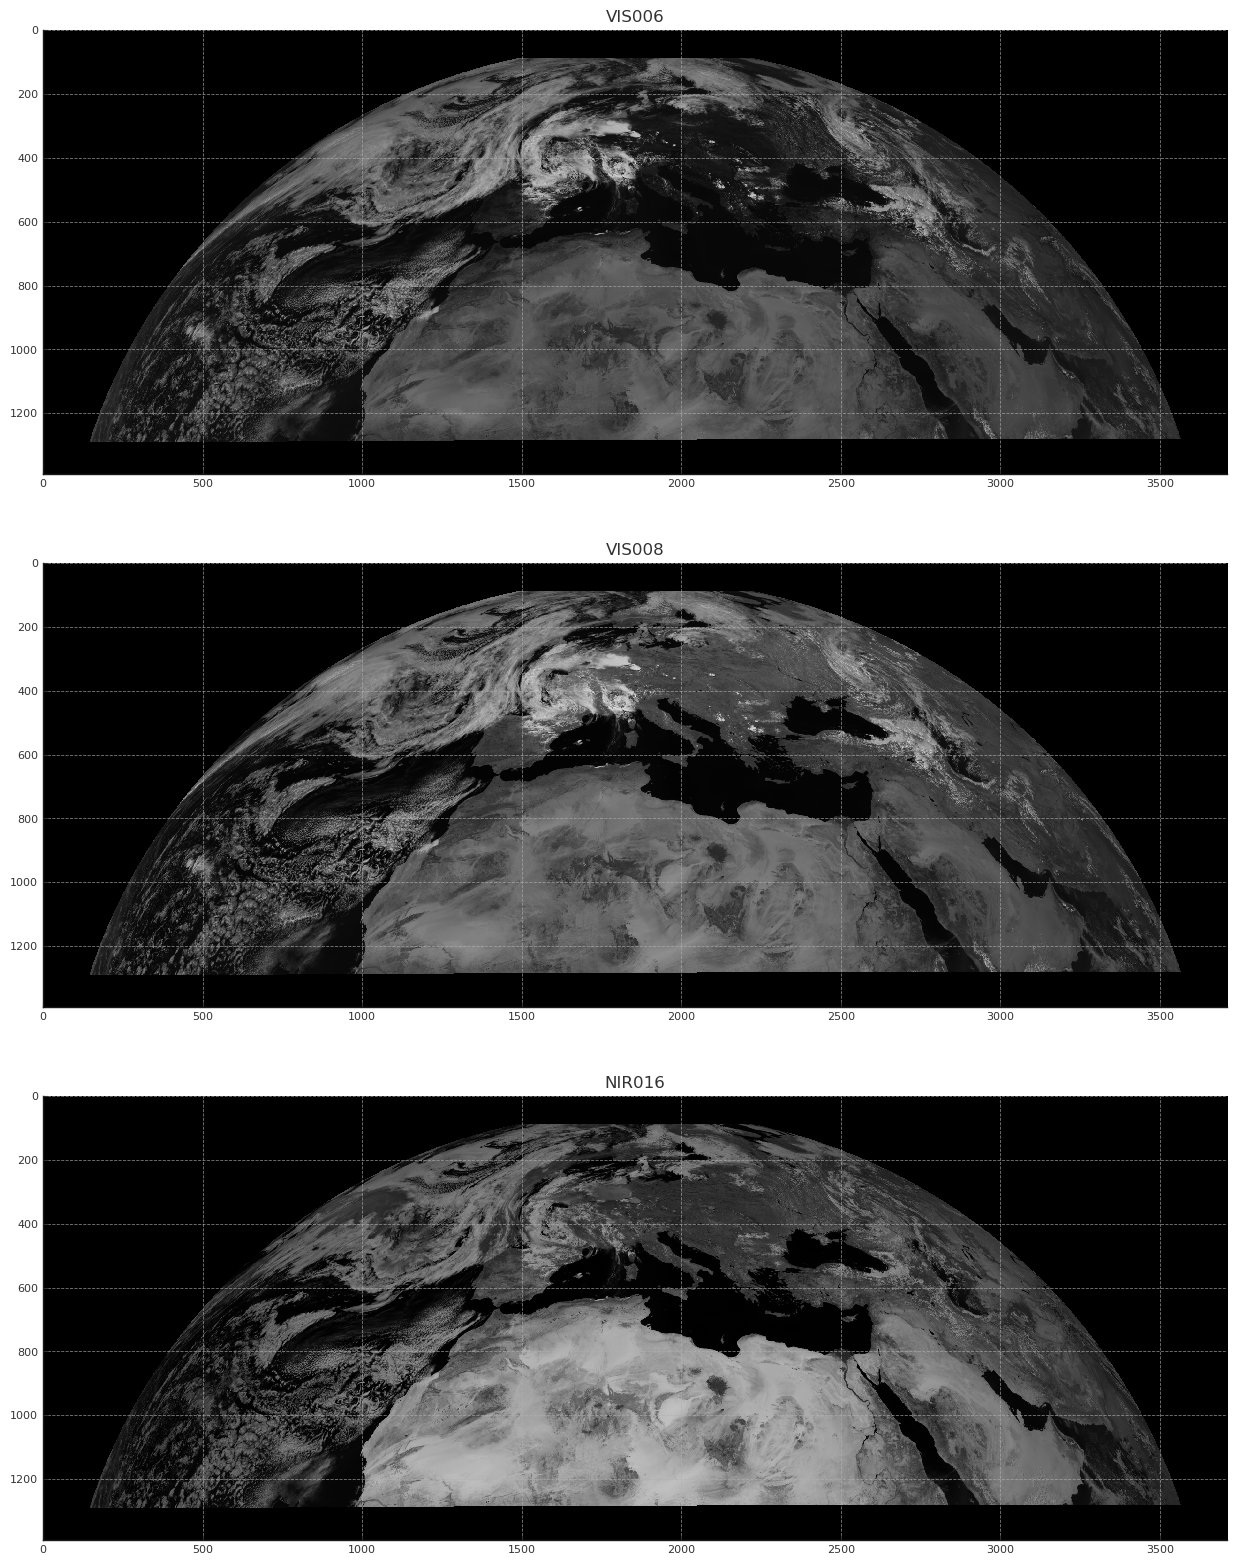

In [9]:
fig,ax = plt.subplots(3,1,figsize=(16,20))
ax[0].imshow(s.ref['VIS006'],vmin=0,vmax=1,cmap='gray')
ax[0].set_title("VIS006")
ax[1].imshow(s.ref['VIS008'],vmin=0,vmax=1,cmap='gray')
ax[1].set_title("VIS008")
ax[2].imshow(s.ref['IR_016'],vmin=0,vmax=1,cmap='gray')
ax[2].set_title("NIR016")

In [10]:
def normalise2range(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def array_to_256(array):
    return (array*255.999).astype("uint8")

def day_natural_composite(vis006_data,vis008_data,nir016_data,factor=1,gamma=1):
    blue = array_to_256(np.clip(vis006_data/factor,0,1)**(1./gamma))
    green = array_to_256(np.clip(vis008_data/factor,0,1)**(1./gamma))
    red = array_to_256(np.clip(nir016_data/factor,0,1)**(1./gamma))
    
    return np.dstack([red,green,blue]).astype("uint8")

In [11]:
nc = day_natural_composite(s.ref['VIS006'], s.ref['VIS008'], s.ref['IR_016'],1,3)

In [12]:
nc.shape

(1392, 3712, 3)

In [13]:
fontprops = {'fontname':'Liberation Serif', 'fontsize':10}

In [14]:
plotwidth = (100/7227) * 408

In [19]:
plotwidth

5.64549605645496

In [15]:
(100/7227) * 408 / 1.618

3.4891817407014587

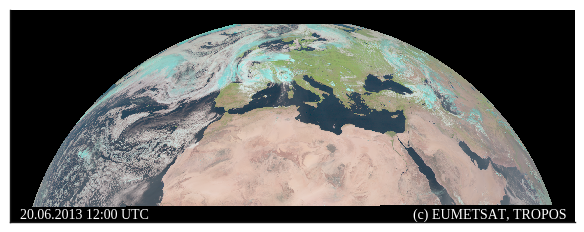

In [16]:
fig,ax = plt.subplots(1,1,figsize=(plotwidth,plotwidth*(nc.shape[0] / nc.shape[1])))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
ax.imshow(nc)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# Zeit und Copyright
ax.text(65,1375,"{}".format(t.strftime("%d.%m.%Y %H:%M UTC")),
        **fontprops,color='white')
ax.text(2650,1370,"(c) EUMETSAT, TROPOS",
        **fontprops,color='white')

plt.savefig("/vols/satellite/home/lenk/notebooks/Dissertation/msg-nc-beispiel.png")

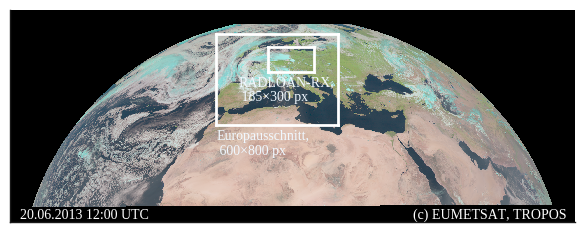

In [17]:
fig,ax = plt.subplots(1,1,figsize=(plotwidth,plotwidth*(nc.shape[0] / nc.shape[1])))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
ax.imshow(nc)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# Zeit und Copyright
ax.text(65,1375,"{}".format(t.strftime("%d.%m.%Y %H:%M UTC")),
        **fontprops,color='white')
ax.text(2650,1370,"(c) EUMETSAT, TROPOS",
        **fontprops,color='white')

# EU-Ausschnitt
ax.plot([1356,2156],[156,156],color='w', linestyle='-', linewidth=2)
ax.plot([1356,2156],[756,756],color='w', linestyle='-', linewidth=2)
ax.plot([1356,1356],[156,756],color='w', linestyle='-', linewidth=2)
ax.plot([2156,2156],[156,756],color='w', linestyle='-', linewidth=2)
ax.text(1356,950,u"Europausschnitt,\n 600\u00D7800 px",
        **fontprops,color='aliceblue')

# RADOLAN-RX-Ausschnitt
ax.plot([1696,1996],[246,246],color='w', linestyle='-', linewidth=2)
ax.plot([1696,1996],[411,411],color='w', linestyle='-', linewidth=2)
ax.plot([1696,1696],[246,411],color='w', linestyle='-', linewidth=2)
ax.plot([1996,1996],[246,411],color='w', linestyle='-', linewidth=2)
ax.text(1500,600,u"RADLOAN-RX,\n 185\u00D7300 px",
        **fontprops,color='aliceblue')

plt.savefig("/vols/satellite/home/lenk/notebooks/Dissertation/msg-nc-beispiel_rss_rx.png")

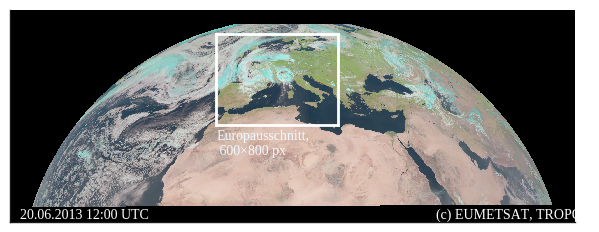

In [18]:
fig,ax = plt.subplots(1,1,figsize=(plotwidth,plotwidth*(nc.shape[0] / nc.shape[1])))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
ax.imshow(nc)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
# Zeit und Copyright
ax.text(65,1375,"{}".format(t.strftime("%d.%m.%Y %H:%M UTC")),
        **fontprops,color='white')
ax.text(2800,1370,"(c) EUMETSAT, TROPOS",
        **fontprops,color='white')

# EU-Ausschnitt
ax.plot([1356,2156],[156,156],color='w', linestyle='-', linewidth=2)
ax.plot([1356,2156],[756,756],color='w', linestyle='-', linewidth=2)
ax.plot([1356,1356],[156,756],color='w', linestyle='-', linewidth=2)
ax.plot([2156,2156],[156,756],color='w', linestyle='-', linewidth=2)
ax.text(1356,950,u"Europausschnitt,\n 600\u00D7800 px",
        **fontprops,color='aliceblue')

plt.savefig("/vols/satellite/home/lenk/notebooks/Dissertation/msg-nc-beispiel_eu.png")

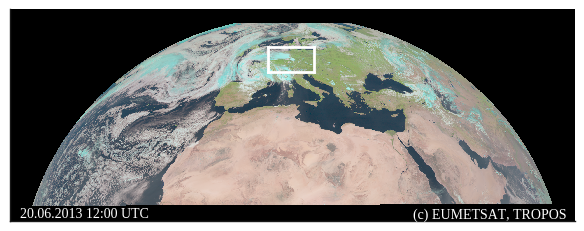

In [20]:
fig,ax = plt.subplots(1,1,figsize=(plotwidth,plotwidth*(nc.shape[0] / nc.shape[1])))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
ax.imshow(nc)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# Zeit und Copyright
ax.text(65,1370,"{}".format(t.strftime("%d.%m.%Y %H:%M UTC")),
        **fontprops,color='white')
ax.text(2650,1370,"(c) EUMETSAT, TROPOS",
        **fontprops,color='white')

# RADOLAN-RX-Ausschnitt
ax.plot([1696,1996],[246,246],color='w', linestyle='-', linewidth=2)
ax.plot([1696,1996],[411,411],color='w', linestyle='-', linewidth=2)
ax.plot([1696,1696],[246,411],color='w', linestyle='-', linewidth=2)
ax.plot([1996,1996],[246,411],color='w', linestyle='-', linewidth=2)
#ax.text(1860,500,u"185 px \u00D7 300 px",
#        **fontprops,color='ghostwhite',horizontalalignment='center')

plt.savefig("/vols/satellite/home/lenk/notebooks/Dissertation/msg-nc-beispiel_rx.png")